In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Acer\Downloads\Bitcoin/bitcoin_price_Training - Training.csv")

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.shape

(1556, 7)

In [6]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


when data is collected over atime period it is a time series data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


.T - transpose

In [9]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [10]:
df['Date']=df['Date'].astype('datetime64[ns]')
# df['Date']=pd.to_datetime(df['Date'])

In [11]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [12]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [13]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [14]:
type(df['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df['Date'][3:8]

3   2017-07-28
4   2017-07-27
5   2017-07-26
6   2017-07-25
7   2017-07-24
Name: Date, dtype: datetime64[ns]

In [16]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [19]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [20]:
data=df.sort_index(ascending=False).reset_index()

sort_index -Veri Analizinde Düzen Sağlama: İndekslerin karışık olduğu durumlarda düzenli bir görünüm elde etmek için.
Hiyerarşik Verilerle Çalışırken: Çok seviyeli indeksleri belirli bir sıraya göre düzenlemek için.
Veri Hazırlama Aşaması: İndekslerin sıralı olması gereken durumlarda (örneğin, grafik çizimi öncesinde).

In [21]:
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [22]:
data.drop('index',axis=1,inplace=True)

In [23]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

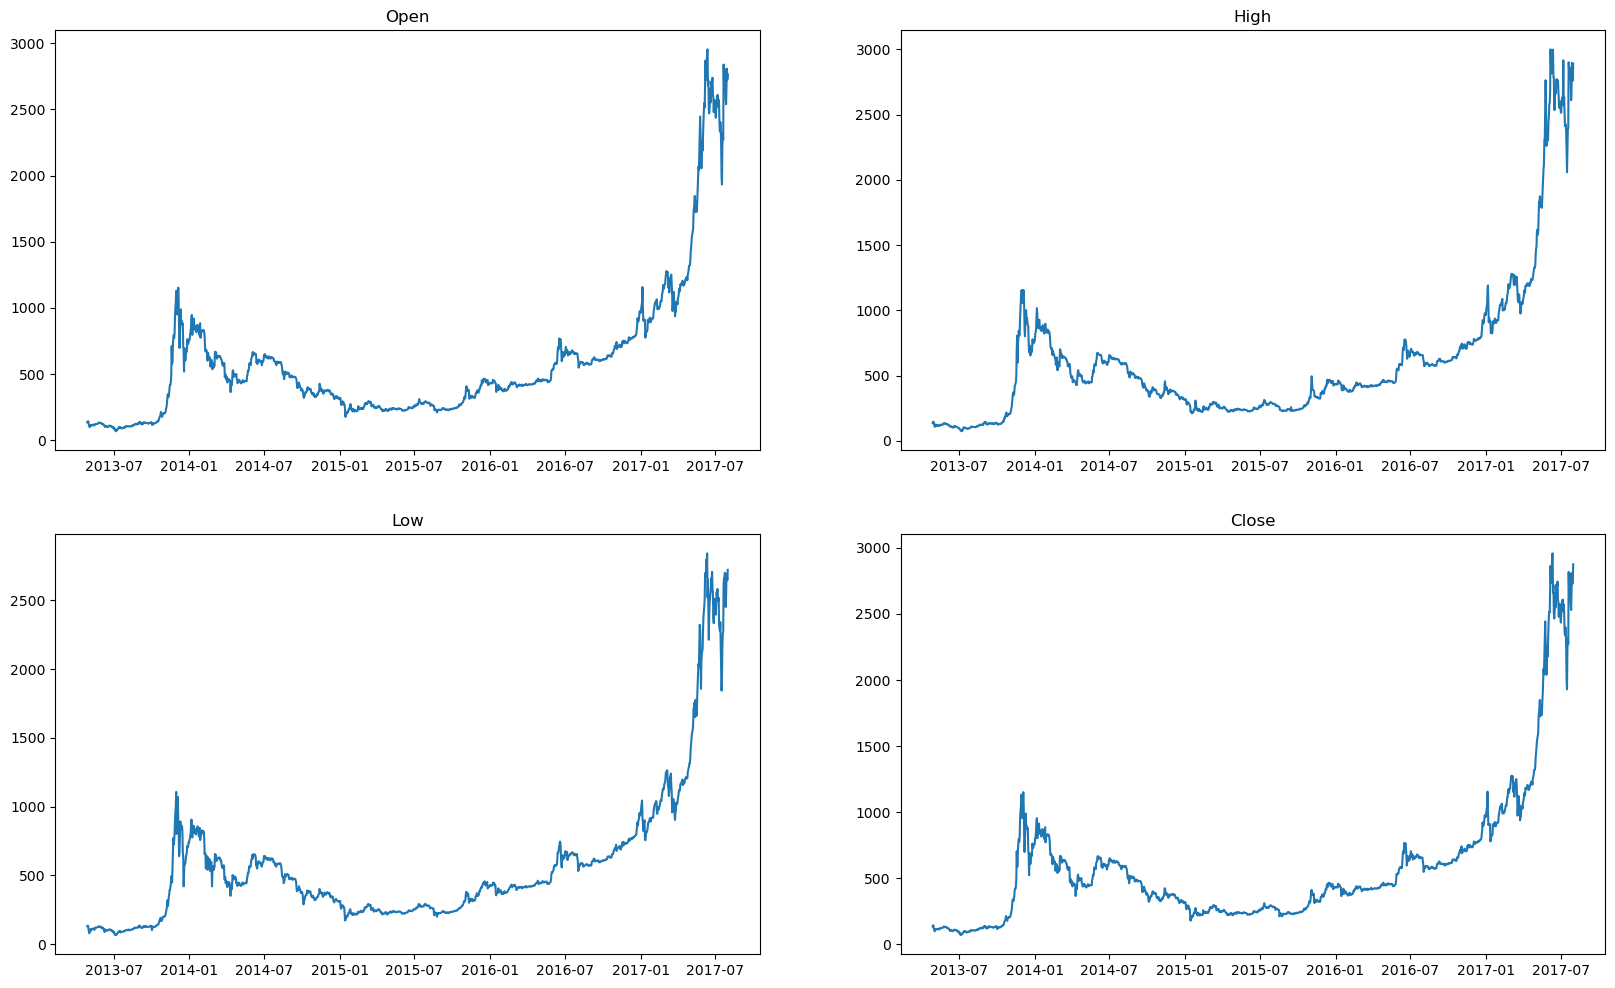

In [24]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'],df[col])
    plt.title(col)
    

In [25]:
!pip install chart_studio
!pip install plotly

In [26]:
 import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [27]:
init_notebook_mode(connected=True)

to use plotly in a offline mode

In [28]:
bitcoin_sample=data[0:50]

In [29]:
trace=go.Candlestick(x=bitcoin_sample['Date'],
              high=bitcoin_sample['High'],
              open=bitcoin_sample['Open'],
              close=bitcoin_sample['Close'],
              low=bitcoin_sample['Low'])

In [30]:
layout={'title':'Bitcoin Historical Prices',
        'xaxis':{'title':'Date',
                }
    
}

In [31]:
fig=go.Figure(data=[trace],layout=layout)
fig.update_layout(xaxis_rangeslider_visible=False)

In [32]:
fig.show()

<Axes: >

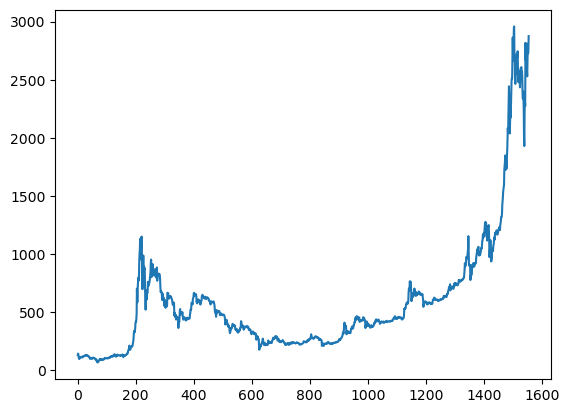

In [33]:
data['Close'].plot()

the x axis should be date but since date col is not set as an index it does not shown like that

In [34]:
data.set_index('Date', inplace=True)

In [35]:
# data.set_index(data['Date']) -- Date col is still a column !!

<Axes: xlabel='Date'>

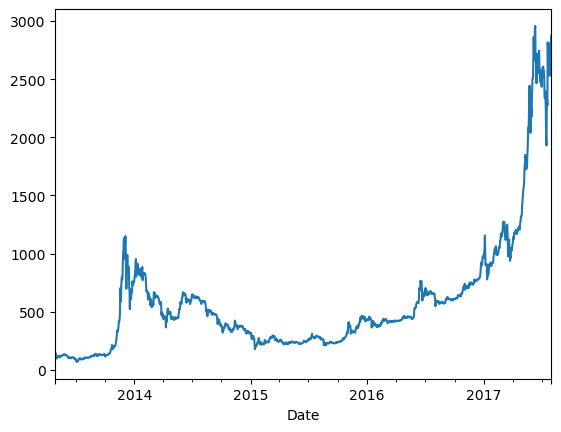

In [36]:
data['Close'].plot()

Text(0.5, 1.0, 'Log Scale Analysis')

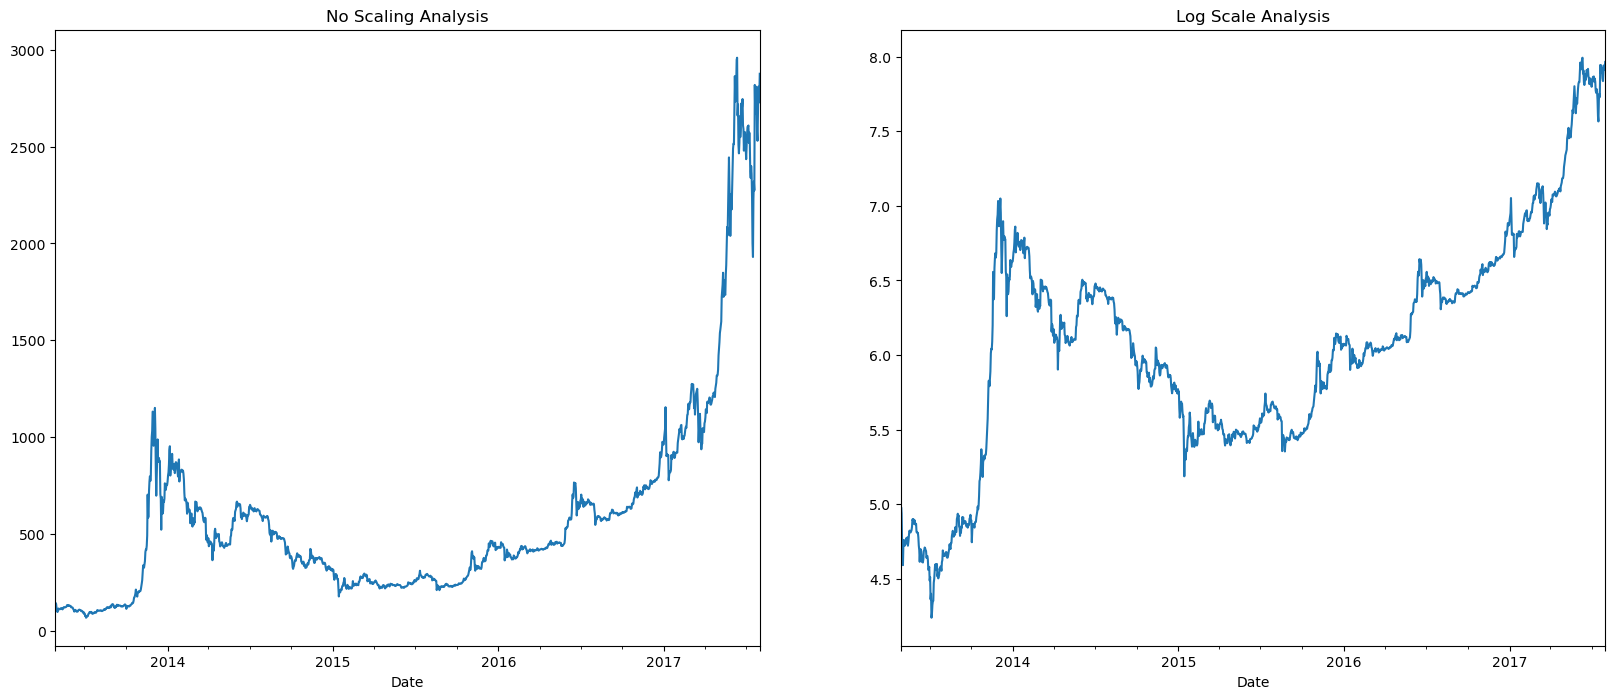

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling Analysis')
plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scale Analysis')

In [38]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


In [39]:
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

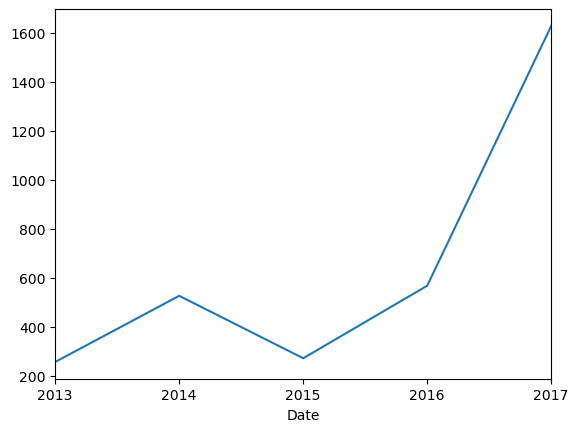

In [40]:
data['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

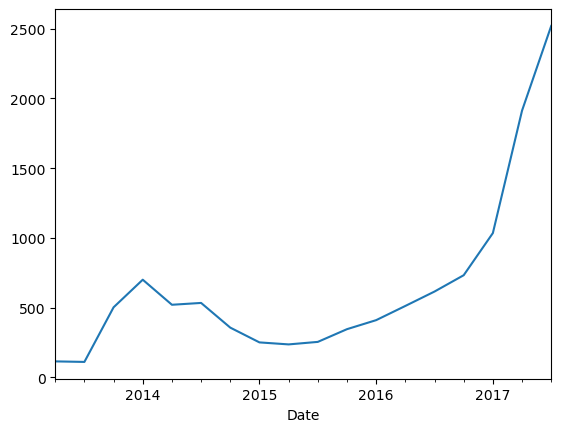

In [87]:
data['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

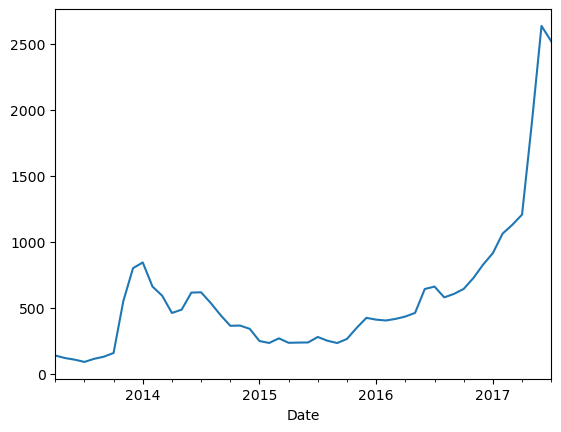

In [88]:
data['Close'].resample('m').mean().plot()

In [89]:
data['Close'].resample('m').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

In [90]:
data['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [92]:
data['close_price_pct_change']=data['Close'].pct_change()*100

<Axes: xlabel='Date'>

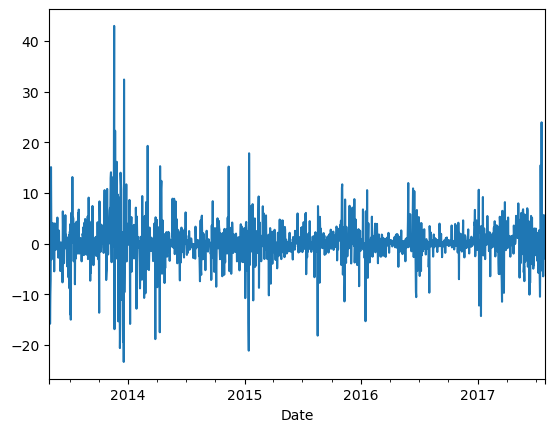

In [93]:
data['close_price_pct_change'].plot()

In [98]:
!pip install cufflinks
import cufflinks as cf
cf.go_offline()

     -------------------------------------- 81.7/81.7 kB 916.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=91d4514ee5520e52840703f5da9176de8b16f2e03a160496b032384862e509a6
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\32\f7\bd\3b5f431b9a740489de249dad87142f8ee000b7c6b6e8e58d54
Successfully built cufflinks


In [99]:
data['close_price_pct_change'].iplot()